# Extended repressilator

This repressilator includes additional "steps" - signalling molecules that act as intermediates between repressors.

In [1]:
pip install -e .

Note: you may need to restart the kernel to use updated packages.


ERROR: File "setup.py" or "setup.cfg" not found. Directory cannot be installed in editable mode: c:\Users\User\OneDrive\Desktop\Masters PJ\GitHub\LOICA\notebooks\repressilators


In [2]:
import loica as lc
import matplotlib.pyplot as plt
import networkx as nx
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
def growth_rate(t):
    return lc.gompertz_growth_rate(t, 0.01, 1, 1, 1)

def biomass(t):
    return lc.gompertz(t, 0.01, 1, 1, 1)

metab = lc.SimulatedMetabolism("Simulated metabolism", biomass, growth_rate)
genetic_n = lc.GeneticNetwork()

In [4]:
strain = lc.Strain('Strain', genetic_n, metab)

In [5]:
# Transcription factors
laci = lc.Regulator(name='LacI', degradation_rate=1)
tetr = lc.Regulator(name='TetR', degradation_rate=1)
ci = lc.Regulator(name='cI', degradation_rate=1)

# Signalling molecules
c4 = lc.Regulator(name='C4', degradation_rate=1, init_concentration=100)
scb2 = lc.Regulator(name='SCB2', degradation_rate=1)
c14 = lc.Regulator(name='C14', degradation_rate=1)

genetic_n.add_regulator([tetr, laci, ci, c4, scb2, c14])

In [6]:
# option with producers
# rhli = lc.Regulator(name='RhlI', degradation_rate=1)
# scbb = lc.Regulator(name='ScbB', degradation_rate=1)
# cini = lc.Regulator(name='CinI', degradation_rate=1)
# genetic_n.add_regulator([rhli, scbb, cini])

In [7]:
mcherry = lc.Reporter(name='mCherry', degradation_rate=1, color='red') 
cyan = lc.Reporter(name='CFP', degradation_rate=1, color='blue') 
mven = lc.Reporter(name='mVenus', degradation_rate=1, color='yellow') 

genetic_n.add_reporter([mcherry, cyan, mven])

In [8]:
#First extended node
c4_laci = lc.Hill1(name='Prhl', input=c4, output=laci, alpha=[0.1, 10000], K=10, n=2)
laci_not_scb2 = lc.Hill1(name='Plac', input=laci, output=[scb2, mcherry], alpha=[10000,0.1], K=10, n=2)

# Second
scb2_tetr = lc.Hill1(name='Pscb', input=scb2, output=tetr, alpha=[0.1,10000], K=10, n=2)
tetr_not_c14 = lc.Hill1(name='Ptet', input=tetr, output=[c14, mven], alpha=[10000,0.1], K=10, n=2)

# Third
c14_ci = lc.Hill1(name='Pcin', input=c14, output=ci, alpha=[0.1, 10000], K=10, n=2)
ci_not_c4 = lc.Hill1(name='PcI', input=ci, output=[c4, cyan], alpha=[10000,0.1], K=10, n=2)


genetic_n.add_operator([c4_laci, laci_not_scb2, scb2_tetr, tetr_not_c14, c14_ci, ci_not_c4])

In [9]:
# # option with producers

# #First extended node
# c4_laci = lc.Hill1(name='Prhl', input=c4, output=laci, alpha=[0.1, 10000], K=10, n=2)
# laci_not_scbb = lc.Hill1(name='Plac', input=laci, output=[scbb, mcherry], alpha=[10000,0.1], K=10, n=2)
# scbb_scb2 = lc.Producer(name='ScbB', input=scbb, output=scb2, k1a=1, k2=1)

# # Second
# scb2_tetr = lc.Hill1(name='Pscb', input=scb2, output=tetr, alpha=[0.1,10000], K=10, n=2)
# tetr_not_cini = lc.Hill1(name='Ptet', input=tetr, output=[cini, mven], alpha=[10000,0.1], K=10, n=2)
# cini_c14 = lc.Producer(name='CinI', input=cini, output=c14, k1a=1, k2=1)

# # Third
# c14_ci = lc.Hill1(name='Pcin', input=c14, output=ci, alpha=[0.1, 10000], K=10, n=2)
# ci_not_rhli = lc.Hill1(name='PcI', input=ci, output=[rhli, cyan], alpha=[10000,0.1], K=10, n=2)
# rhli_c4 = lc.Producer(name='ScbB', input=rhli, output=c4, k1a=1, k2=1)


# genetic_n.add_operator([c4_laci, laci_not_scbb, scbb_scb2, scb2_tetr, tetr_not_cini, cini_c14, c14_ci, ci_not_rhli, rhli_c4])

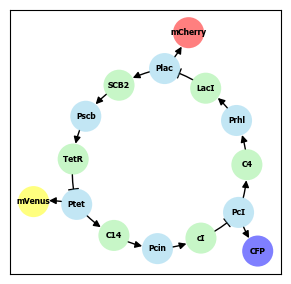

In [10]:
plt.figure(figsize=(3.5,3.5), dpi=100)
genetic_n.draw()

In [11]:
sample = lc.Sample(strain=strain)
assay = lc.Assay([sample], 
                n_measurements=100, 
                interval=0.24,
                name='Extended repressilator',
                description='Simulated expression of extended repressilator strain'
                )

In [13]:
assay.run(stochastic=False, track_all=True)

  0%|          | 0/100 [00:00<?, ?it/s]

t=4.008
TetR ext conc = 0.0
                int conc in Strain = 212.30348493056508
after step in genetic network: ext conc = 0.0
                added internal conc (without diffusion)= -6.156904120240886
                total new int conc = 206.1465808103242
                biomass = 0.18280318818145305
                ppod = 2660000000.0
                cell number = 486256480.5626651
                ext diff = 0.0
t=4.008
LacI ext conc = 0.0
                int conc in Strain = 483.0215505146632
after step in genetic network: ext conc = 0.0
                added internal conc (without diffusion)= -16.31191484731455
                total new int conc = 466.70963566734866
                biomass = 0.18280318818145305
                ppod = 2660000000.0
                cell number = 486256480.5626651
                ext diff = 0.0
t=4.008
cI ext conc = 0.0
                int conc in Strain = 657.9476158228701
after step in genetic network: ext conc = 0.0
                added interna

100%|██████████| 100.0/100 [01:51<00:00,  1.11s/it]


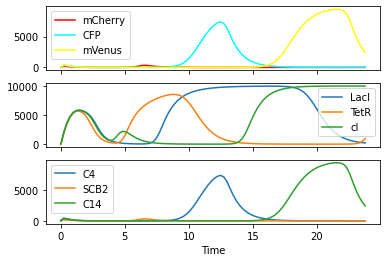

In [16]:
m = assay.measurements
fig,(ax, ax1, ax2) = plt.subplots(3,1, sharex=True)
m[m.Signal=='mCherry in Strain'].plot(x='Time', y='Measurement', color='red', style='-', ax=ax)
m[m.Signal=='CFP in Strain'].plot(x='Time', y='Measurement', color='cyan', style='-', ax=ax)
m[m.Signal=='mVenus in Strain'].plot(x='Time', y='Measurement', color='yellow', style='-', ax=ax)
m[m.Signal=='LacI in Strain'].plot(x='Time', y='Measurement', style='-', ax=ax1)
m[m.Signal=='TetR in Strain'].plot(x='Time', y='Measurement', style='-', ax=ax1)
m[m.Signal=='cI in Strain'].plot(x='Time', y='Measurement', style='-', ax=ax1)
m[m.Signal=='C4 in Strain'].plot(x='Time', y='Measurement', style='-', ax=ax2)
m[m.Signal=='SCB2 in Strain'].plot(x='Time', y='Measurement', style='-', ax=ax2)
m[m.Signal=='C14 in Strain'].plot(x='Time', y='Measurement', style='-', ax=ax2)
ax.legend(['mCherry', 'CFP', 'mVenus'])
ax1.legend(['LacI', 'TetR', 'cI'])
ax2.legend(['C4', 'SCB2', 'C14'])

Then I can also change how each signal diffuses (to see how that affects the system)